In [6]:
import pandas as pd
import xlsxwriter
import seaborn as sns

nyc = pd.read_excel('nyc-pop.xlsx', index_col='year')

nyc.head()

,manhattan,brooklyn,queens,bronx,staten-island
year,,,,,
1800,60515,5740,6642,1755,4563
1810,96373,8303,7444,2267,5347
1820,123706,11187,8246,2782,6135
1830,202589,20535,9049,3023,7082
1840,312710,47613,14480,5346,10965


<AxesSubplot:xlabel='year'>

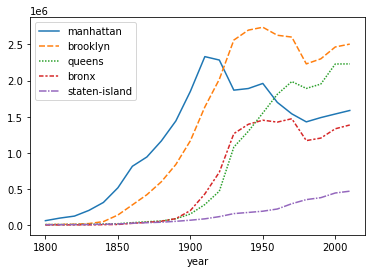

In [7]:
sns.lineplot(data=nyc)

In [8]:
# Set Pandas engine to xlsxwriter
writer = pd.ExcelWriter('nyc-trend.xlsx', engine='xlsxwriter')

# Convert the dataframe to an XlsxWriter Excel object.
nyc.to_excel(writer, sheet_name='Sheet1', index=False)

# Get the xlsxwriter objects from the DataFrame writer object.
workbook  = writer.book
worksheet = writer.sheets['Sheet1']

In [9]:
# Reset index
nyc = nyc.reset_index()
nyc.head()

,year,manhattan,brooklyn,queens,bronx,staten-island
0,1800,60515,5740,6642,1755,4563
1,1810,96373,8303,7444,2267,5347
2,1820,123706,11187,8246,2782,6135
3,1830,202589,20535,9049,3023,7082
4,1840,312710,47613,14480,5346,10965


In [ ]:
nyc_chart = workbook.add_chart({'type': 'line'})
max_row = nyc.shape[0]

# [sheetname, first_row, first_col, last_row, last_col]


nyc_chart.add_series({
    'name':       ['Sheet1', 0, nyc.columns.get_loc('borough'), 0, nyc.columns.get_loc('borough')],
    'categories': ['Sheet1', 1, 0, max_row, 0],
    'values':     ['Sheet1', 1, 2, max_row, 2],
})

# Insert the chart into the worksheet.
worksheet.insert_chart('G2', nyc_chart)

writer.close()